In [103]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import time

df = pd.read_csv('C:\\Users\\...\\Downloads\\breast-cancer-wisconsin-data\\data.csv').drop(columns = 'Unnamed: 32')

In [104]:
df['diagnosis'] = df['diagnosis'].astype(str).apply(lambda x: 1 if x == 'M' else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [49]:
# Wow. This is a very user-friendly dataset! No null values.
# Most of the dtypes are float... Let's see what patterns we can find with the diagnosis categories...
# This problem is a classification probelm, so, determining clusters in our data is key now.
df.corr()[['diagnosis']].sort_values('diagnosis', ascending = False)

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [102]:
# It looks like the 'concave points_worst' has the highest positive correlation to diagnosis...
# Let's visualize the data...
fig = make_subplots(rows = round(len(list(set(df.columns.to_list()) - set(['id']))) / 2), cols = 2, subplot_titles = list(set(df.columns.to_list())))

row = 1
for col in enumerate(list(set(df.columns.to_list()) - set(['id']))):
    if (col[0] + 1) % 2 == 0:
        fig.add_trace(go.Histogram(x=df[df['diagnosis'] == 1][col[1]], name = 'Malignant', histnorm = 'probability'), row = row, col = 2)
        fig.add_trace(go.Histogram(x=df[df['diagnosis'] == 0][col[1]], name = 'Benign', histnorm = 'probability'), row = row, col = 2)

        row += 1
        
    else:
        fig.add_trace(go.Histogram(x=df[df['diagnosis'] == 1][col[1]], name = 'Malignant', histnorm = 'probability'), row = row, col = 1)
        fig.add_trace(go.Histogram(x=df[df['diagnosis'] == 0][col[1]], name = 'Benign', histnorm = 'probability'), row = row, col = 1)

fig.update_layout(width = 1250, height = 1500, barmode = 'stack')
fig.show()

C:\Users\Damyn\Documents\Anaconda\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



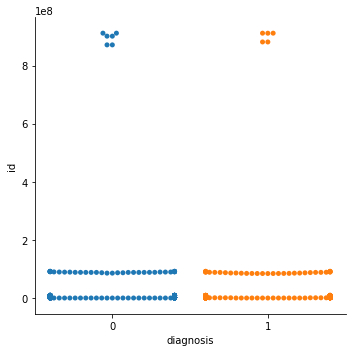

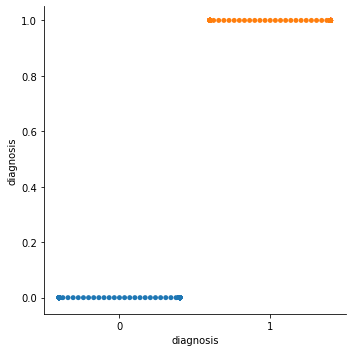

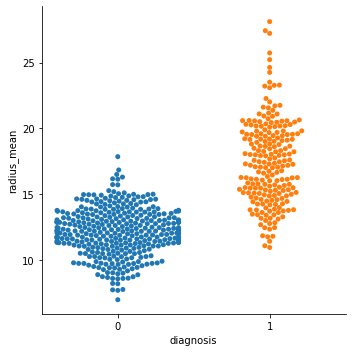

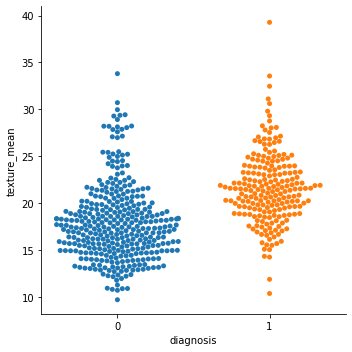

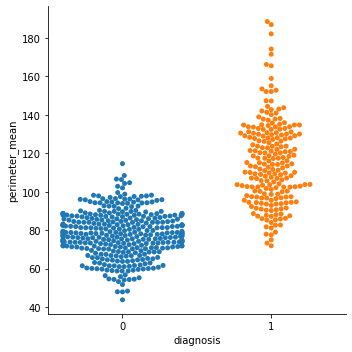

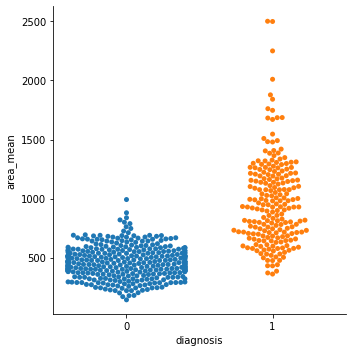

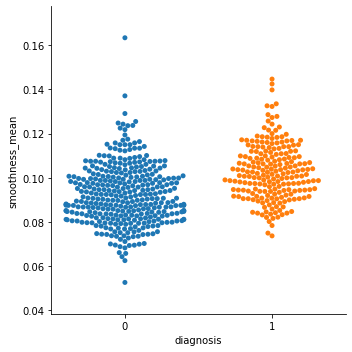

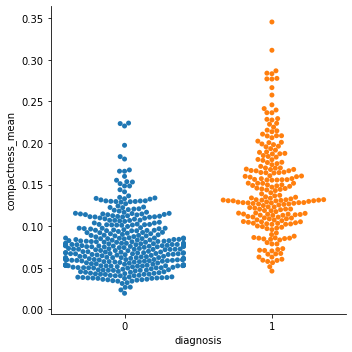

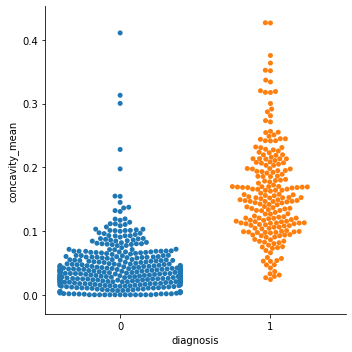

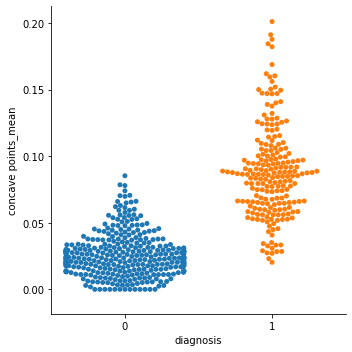

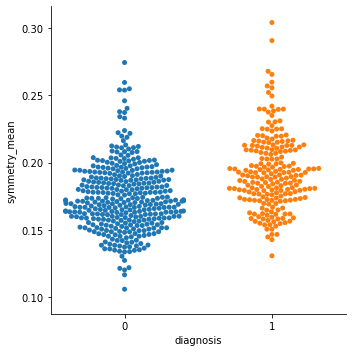

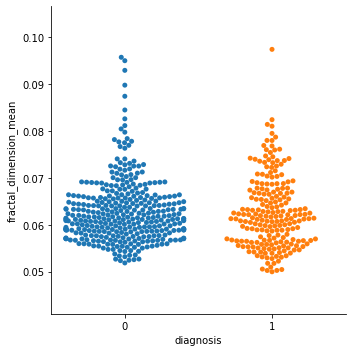

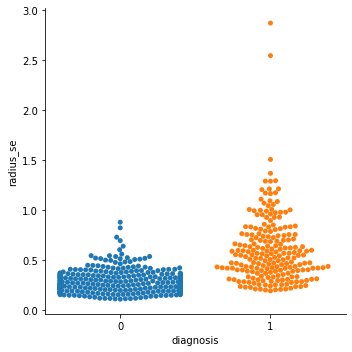

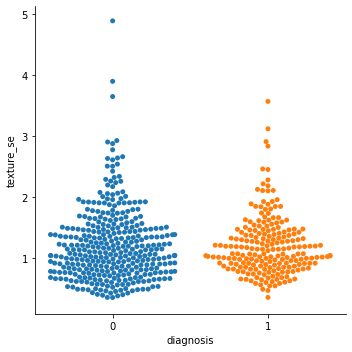

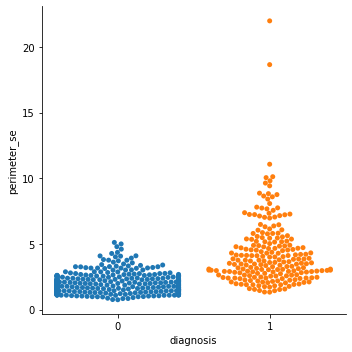

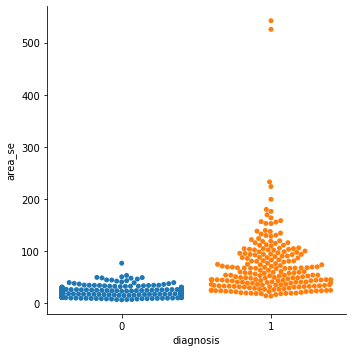

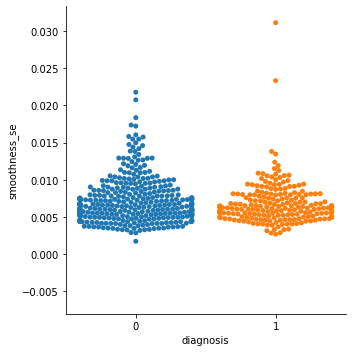

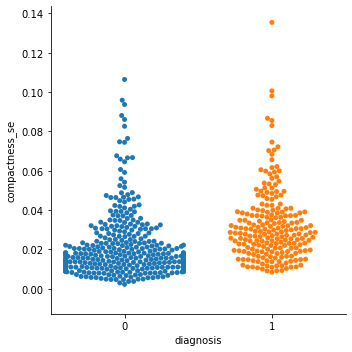

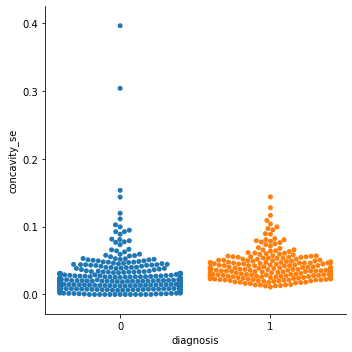

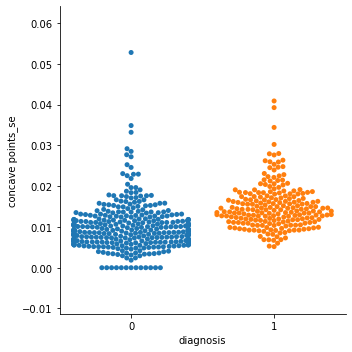

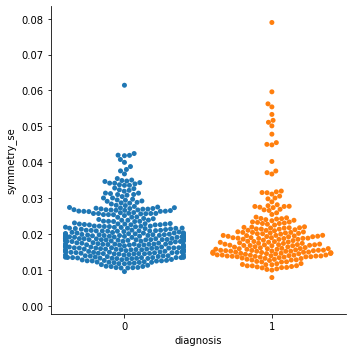

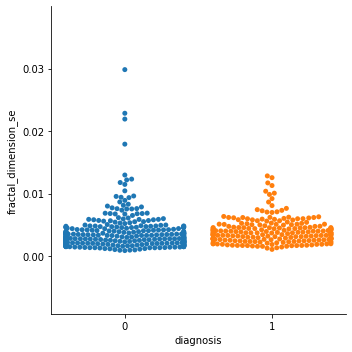

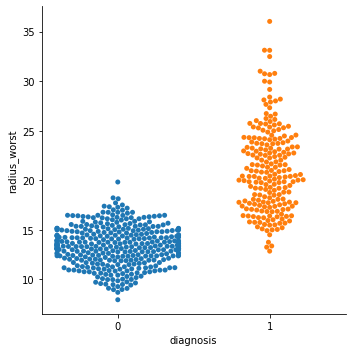

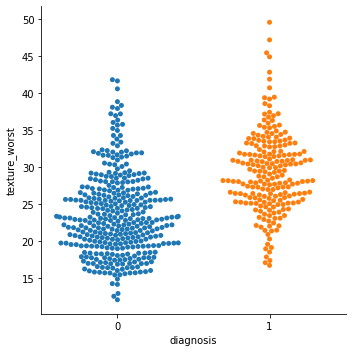

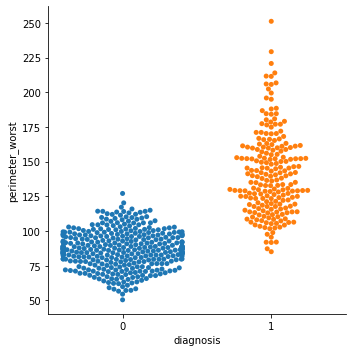

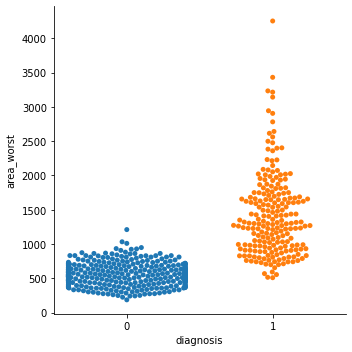

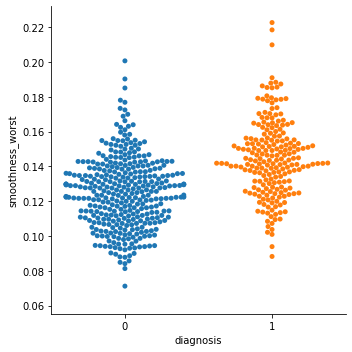

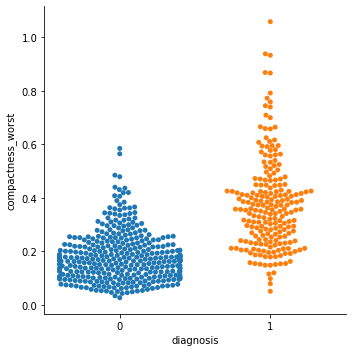

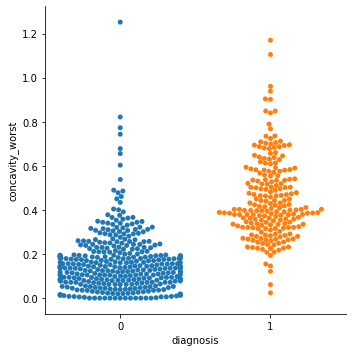

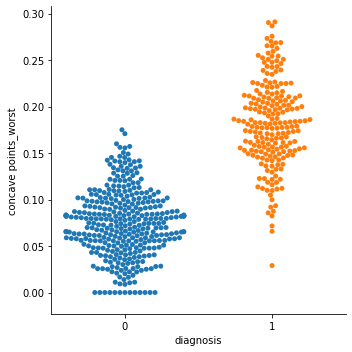

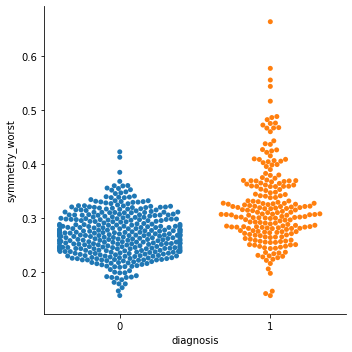

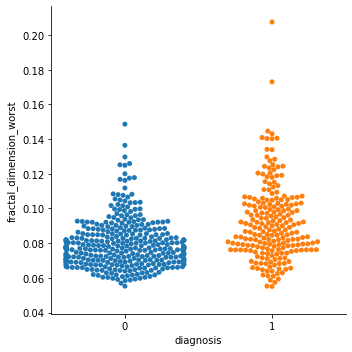

In [109]:
# When comparing the correlation values and the histograms above, there are distinct differences that appear
# between the two diagnosis groups. Spefically:
# 1) concave points_worst
# 2) perimeter_worst
# 3) concave points_mean
# 4) radius_worst
# 5) perimeter_mean

# We use Seaborn to use a Swarm Plot to visualize 'clusters' in the data...
for col in df.columns.to_list():
    sns.catplot(x = "diagnosis", y = col, kind="swarm", data = df)

In [ ]:
# We run a Z-Test on a specific column with a sample size of 100 to determine if
# there exists any statistical differnce between the Benign and Malignant groups
# for the column in question...
# By doing so, we will bring quantitative clarity to the Data Visuals and the Correlation test.
# We will also be able to validate which fields best display clusters of data.
# Similarly, after fitting an unsupervised Machine Learning model, we should be able to
# validate which fields the algorthim has selected to best classify a growth.